# Fine-tuning du modèle stable-diffusion-v1-5 avec 400 steps

In [ ]:
!apt-get install git
!git clone https://github.com/huggingface/diffusers

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Cloning into 'diffusers'...
remote: Enumerating objects: 87060, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 87060 (delta 41), reused 19 (delta 13), pack-reused 86982 (from 3)
Receiving objects: 100% (87060/87060), 62.86 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (64085/64085), done.


In [ ]:
!pip install -r /content/diffusers/examples/text_to_image/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.9 MB/s eta 0:00:00


In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5"  \
  --instance_data_dir="/content/ziyad_images" \
  --output_dir="/content/finetuned400" \
  --instance_prompt="Image of ziyad hadine smiling" \
  --resolution=512 \
  --mixed_precision="fp16" \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400 \
  --gradient_checkpointing \
  --use_8bit_adam

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-04-13 12:55:41.085593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744548941.175420    2825 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744548941.197988    2825 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 12:55:41.289904: I tensorflow/core/platform

In [ ]:
!sudo apt-get install zstd

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  zstd
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 603 kB of archives.
After this operation, 1,695 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 zstd amd64 1.4.8+dfsg-3build1 [603 kB]
Fetched 603 kB in 2s (311 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package zstd.
(Reading database ... 126315 files and directories currently i

In [ ]:
!tar -cf finetuned_steps400_epoch1.tar.zst -I zstd /content/finetuned400

tar: Removing leading `/' from member names


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Path to the file in Colab
source_file = '/content/finetuned_steps400_epoch1.tar.zst'

# Destination path in Google Drive
destination_path = '/content/drive/MyDrive/finetuned_step400_epoch1.tar.zst'

# Move the file
shutil.move(source_file, destination_path)

print("File moved to Google Drive successfully!")

File moved to Google Drive successfully!


In [ ]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

unet = UNet2DConditionModel.from_pretrained("/content/finetuned400/unet")
text_encoder = CLIPTextModel.from_pretrained("/content/finetuned400/text_encoder")

pipe = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", unet=unet, text_encoder=text_encoder, dtype=torch.float16,
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

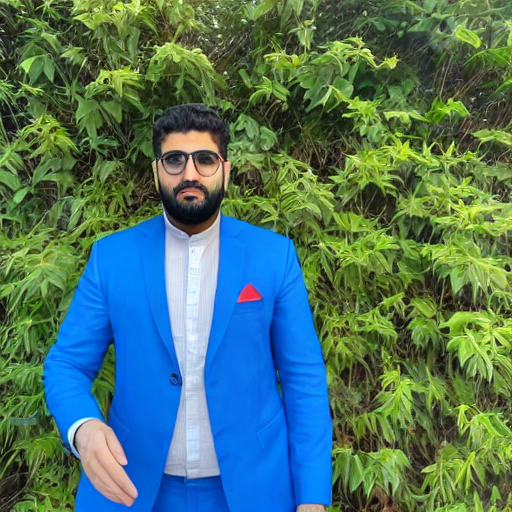

In [ ]:
image = pipe("Image of ziyad wearing a blue suit ", num_inference_steps=50, guidance_scale=7.5).images[0]
image

# Fine-tuning du modèle stable-diffusion-v1-5 avec 800 steps

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5"  \
  --instance_data_dir="/content/ziyad_images" \
  --output_dir="/content/finetuned800" \
  --instance_prompt="Image of ziyad hadine smiling" \
  --resolution=512 \
  --mixed_precision="fp16" \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=800 \
  --gradient_checkpointing \
  --use_8bit_adam

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-04-13 13:28:01.578599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744550881.603590   11230 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744550881.610343   11230 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
04/13/2025 13:28:07 - INFO - __main__ - Distributed en

In [ ]:
!tar -cf finetuned_steps800_epoch1.tar.zst -I zstd /content/finetuned800

tar: Removing leading `/' from member names


In [ ]:
import shutil

# Path to the file in Colab
source_file = '/content/finetuned_steps800_epoch1.tar.zst'

# Destination path in Google Drive
destination_path = '/content/drive/MyDrive/finetuned_step800_epoch1.tar.zst'

# Move the file
shutil.move(source_file, destination_path)

print("File moved to Google Drive successfully!")

File moved to Google Drive successfully!


In [ ]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

unet = UNet2DConditionModel.from_pretrained("/content/finetuned800/unet")
text_encoder = CLIPTextModel.from_pretrained("/content/finetuned800/text_encoder")

pipe = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", unet=unet, text_encoder=text_encoder, dtype=torch.float16,
).to("cuda")

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

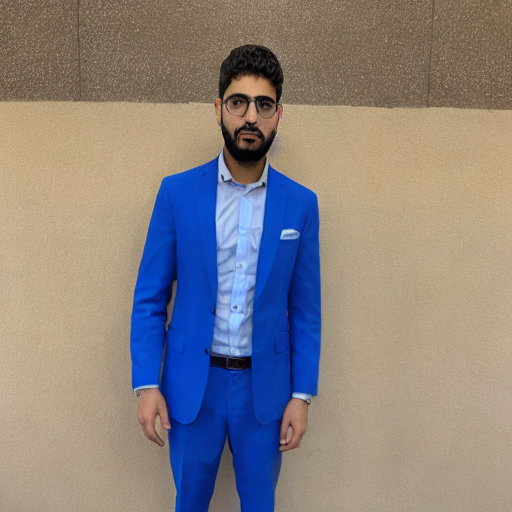

In [ ]:
image = pipe("Image of ziyad hadine wearing a blue suit ", num_inference_steps=50, guidance_scale=7.5).images[0]
image